In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pylab

from pycocotools.coco import COCO
from matplotlib.collections import PatchCollection
from matplotlib.patches import Polygon

def showAnns(anns):
    """
    Define our own showAnns because our annotations don't have segmentation masks
    which results in an error with COCO.showAnns
    """
    ax = plt.gca()
    ax.set_autoscale_on(False)
    polygons = []
    color = []
    for ann in anns:
        print(ann['bbox'])
        c = (np.random.random((1, 3))*0.6+0.4).tolist()[0]
        [bbox_x, bbox_y, bbox_w, bbox_h] = ann['bbox']
        poly = [[bbox_x, bbox_y], [bbox_x, bbox_y+bbox_h], [bbox_x+bbox_w, bbox_y+bbox_h], [bbox_x+bbox_w, bbox_y]]
        np_poly = np.array(poly).reshape((4,2))
        polygons.append(Polygon(np_poly))
        color.append(c)
    p = PatchCollection(polygons, facecolor=color, linewidths=0, alpha=0.4)
    ax.add_collection(p)
    p = PatchCollection(polygons, facecolor='none', edgecolors=color, linewidths=2)
    ax.add_collection(p)

In [5]:
dataDir='../data/raw/crowdhuman_debug'
dataType='train' # train or val
annFile=f'{dataDir}/annotations/{dataType}.json'
coco=COCO(annFile)

loading annotations into memory...
Done (t=0.04s)
creating index...
index created!


In [6]:
cats = coco.loadCats(coco.getCatIds())
nms=[cat['name'] for cat in cats]
print('COCO categories: \n{}\n'.format(' '.join(nms)))

nms = set([cat['supercategory'] for cat in cats])
print('COCO supercategories: \n{}'.format(' '.join(nms)))

COCO categories: 
person mask

COCO supercategories: 
none


In [7]:
catIds = coco.getCatIds(catNms=['person']);
imgIds = coco.getImgIds(catIds=catIds );
img = coco.loadImgs(imgIds[np.random.randint(0,len(imgIds))])[0]
print(img)

{'file_name': '282555,e2da00015e79d36.jpg', 'height': 640, 'width': 960, 'id': 79}


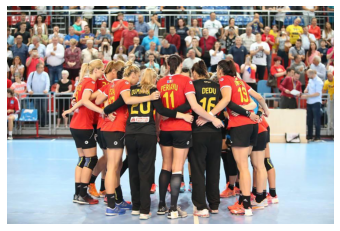

In [8]:
from PIL import Image

imageDir = f'{dataDir}/Images'
I = Image.open(f'{imageDir}/{img["file_name"]}')
plt.axis('off')
plt.imshow(I)
plt.show()

[553, 153, 223, 466]
[443, 154, 304, 471]
[427, 139, 217, 491]
[274, 179, 278, 454]
[252, 160, 202, 460]
[171, 152, 155, 435]
[183, 154, 194, 424]
[159, 174, 280, 420]
[481, 175, 85, 377]
[592, 189, 181, 414]
[859, 183, 73, 220]
[791, 187, 80, 193]
[920, 191, 68, 205]
[877, 141, 63, 161]
[821, 138, 68, 175]
[758, 145, 68, 174]
[682, 139, 57, 197]
[621, 140, 67, 183]
[591, 102, 51, 155]
[643, 85, 70, 177]
[710, 75, 66, 159]
[499, 124, 87, 169]
[389, 136, 66, 164]
[445, 141, 73, 150]
[441, 95, 68, 137]
[523, 93, 55, 130]
[401, 103, 53, 125]
[350, 87, 60, 143]
[308, 111, 51, 134]
[265, 89, 49, 139]
[210, 95, 65, 156]
[165, 93, 63, 191]
[110, 82, 64, 189]
[55, 164, 76, 202]
[137, 186, 58, 182]
[1, 194, 68, 174]
[-27, 239, 71, 158]
[52, 122, 64, 165]
[5, 143, 51, 139]
[3, 84, 64, 172]
[59, 87, 63, 141]
[-31, 102, 53, 144]
[-22, 58, 48, 147]
[16, 46, 57, 141]
[66, 56, 59, 139]
[116, 53, 57, 164]
[165, 55, 53, 150]
[209, 54, 55, 136]
[256, 58, 54, 124]
[304, 18, 60, 165]
[327, 41, 65, 148]
[3

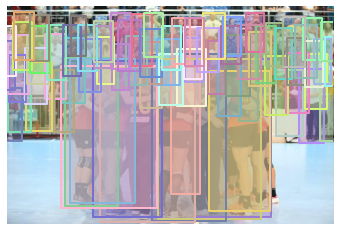

In [9]:


plt.imshow(I); plt.axis('off')
annIds = coco.getAnnIds(imgIds=img['id'], catIds=catIds, iscrowd=None)
anns = coco.loadAnns(annIds)


    
showAnns(anns)